In [1]:
import matplotlib.pyplot as plt

In [20]:
import pandas as pd
import numpy as np

In [5]:
!ls

draw.ipynb  test_1.csv	test_2.csv  test_3.csv


In [6]:
a=pd.read_csv('test_1.csv')

In [34]:
def K_or_M(x):
    if x>=20:
        return str(2**(x-20))+'M'
    else:
        return str(2**(x-10))+'K'

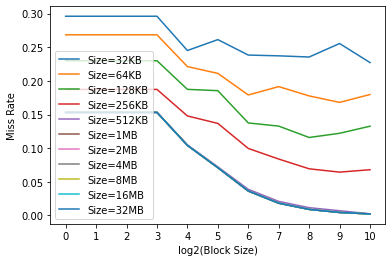

In [39]:
x=a.loc[a['Size']==16]['Block Size'].to_numpy()
legend=[]
# y=a.loc[a['Size']==15]['Miss Rate']
# x_line=2**x
plt.xticks(x)
plt.xlabel('log2(Block Size)')
plt.ylabel('Miss Rate')
# plt.plot(x,y)
for y in range(15,26):
    plt.plot(x,a.loc[a['Size']==y]['Miss Rate'])
    legend.append(f'Size={K_or_M(y)}B')
plt.legend(legend,loc='lower left')
plt.savefig('test_1.png',dpi=400)
# a.loc[a['Size']==16]['Miss Rate'].plot()

In [40]:
b=pd.read_csv('test_2.csv')

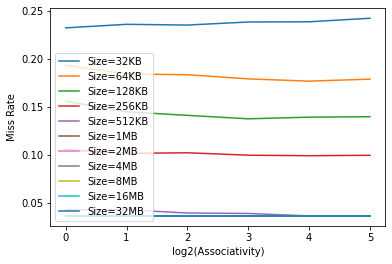

In [74]:
x=b.loc[b['Size']==16]['Associativity'].to_numpy()
legend=[]
plt.xticks(x)
plt.xlabel('log2(Associativity)')
plt.ylabel('Miss Rate')
# plt.plot(x,y)
for y in range(15,26):
    plt.plot(x,b.loc[b['Size']==y]['Miss Rate'])
    legend.append(f'Size={K_or_M(y)}B')
plt.legend(legend,loc='lower left')     
plt.savefig('test_2.png',dpi=400)

In [55]:
c=pd.read_csv('test_3.csv')

In [72]:
c.head()

,Size,Write Through,Write Allocate,Latency
0,15,0,0,8181816
1,15,1,0,12153939
2,15,0,1,7693845
3,15,1,1,11955198
4,16,0,0,6898788


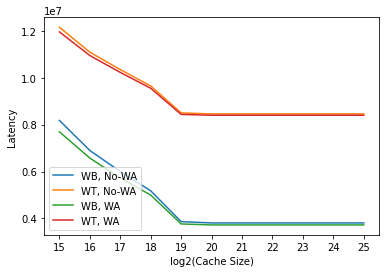

In [83]:
x=range(15,26)
legend=['WB, No-WA','WT, No-WA','WB, WA','WT, WA']
plt.xticks(x)
plt.xlabel('log2(Cache Size)')
plt.ylabel('Latency')
# plt.plot(x,y)
for y in range(4):
    plt.plot(x,c.loc[(c['Write Through']==(y&0b1) )& (c['Write Allocate']==((y&0b10)>>1))]['Latency'])
    # legend.append(f'Size={K_or_M(y)}B')
plt.legend(legend,loc='lower left')
plt.savefig('test_3.png',dpi=400)